# Nonlinear Advection Equation in 1D

Here we explore numerical solutions to the non-linear advection equation in 1D

\begin{align}
  \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0
\end{align}

where $u = u(x,t)$. Note that the only difference between this equation and the linear advection equation is that the wave speed $c$ has been replaced with the variable $u(x,t)$. Analytical solutions to this equation still propagate in the positive $x$ direction, but they do not maintain their shape.

To solve numerically, as before, we use a forward-time, backward-space finite difference scheme. This leads to the discretized version of the non-linear advection equation in 1D

\begin{align}
  u^{n+1}_{i} = u^{n}_{i} - \frac{\Delta{t}}{\Delta{x}}u^{n}_{i}\left(u^{n}_{i} - u^{n}_{i-1}\right)
\end{align}

In [11]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [7]:
# setup spatial grid (vertex-centered)
L = 2.0         # size of physical grid
nx = 41         # total number of grid points
dx = L/(nx-1)   # grid spacing
x = np.linspace(0, L, nx)
print('grid spacing is',dx)

# setup time grid
dt = 0.025      # size of timesteps
nt = 20         # total number of timesteps
print('time stepsize is',dt)

# stability diagnostics
v = dx/dt # characteristic grid speed
print('characteristic grid speed is',v)

('grid spacing is', 0.05)
('time stepsize is', 0.025)
('characteristic grid speed is', 2.0)


In [8]:
# initialize grid functions
u = np.zeros(nx) # grid function at the current step
un = np.ones(nx) # grid function at the previous step

# initial data
a = int(0.25*L/dx) #location of the first jump
b = int(0.5*L/dx)  #location of the second jump
u[:a] = 1.         #value before the first jump
u[a:b] = 2.        #value between first and second jumps
u[b:] = 1.         #value after the second jump
umax0 = np.amax(u) #max value (for plotting purposes)
print(u)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]


In [9]:
### added for 3d wireframe plots ###
# initialize output arrays
pstep = 1   # number of time steps between printing
nout = 1 + nt//pstep # number of snapshots that will be printed
tdata = np.zeros(nout)                    # initialize time step output array
xdata = np.linspace(0, L, nx)              # initialize xgrid output array
udata = np.zeros((len(tdata),len(xdata))) # initialize grid function output array
# print initial data to output arrays
tdata[0] = 0.
udata[0,:] = u[:]
# reset print counter
iprint=1

<IPython.core.display.Javascript object>


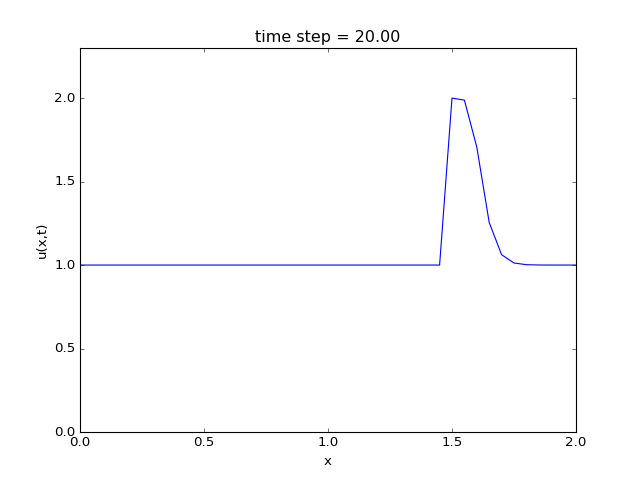

In [10]:
# function to update plot at each time step
def replot(n, x, u, ax):
    ax.cla()
    ax.set_ylim(0, 1.15*umax0)
    ax.set_xlim(0, L)
    ax.set_xlabel('x')
    ax.set_ylabel('u(x,t)')
    ax.set_title('time step = %.2f' % n)
    ax.plot(x,u)
    fig.canvas.draw()
    #time.sleep(0.01)

# create figure
fig = plt.figure()
ax = fig.add_subplot(111)

#plot initial configuration
replot(0, x, u, ax)

# solve
for n in range(1,nt+1):
    un = u.copy()
    for i in range (1,nx):
        # evolve solution using forward-time backward-space (FTBS) scheme
        u[i] = un[i] - un[i]/v*(un[i] - un[i-1])

    # update plot
    replot(n, x, u, ax)

    # save output
    if (n % pstep == 0):
        # print time step
        tdata[iprint] = n*dt
        # print grid functions
        udata[iprint,:] = u[:] 
        # increment print counter
        iprint = iprint + 1

<IPython.core.display.Javascript object>


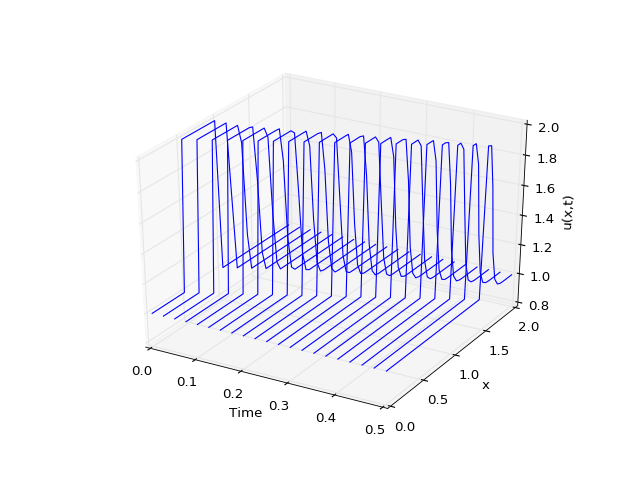

In [6]:
# 3d wireframe plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
XX, TT = np.meshgrid(xdata, tdata)
ax.plot_wireframe(TT, XX, udata, rstride=1, cstride=0)
ax.set_xlabel('Time')
ax.set_ylabel('x')
ax.set_zlabel('u(x,t)')
plt.show()

## Explorations

E1. 